# Tutorial 1 : Python and PyTorch for Deep Neural Networks

## Follow instructions given in the PyTorch [website](http://pytorch.org/) for installation

In [1]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt

Image size: (280, 192)


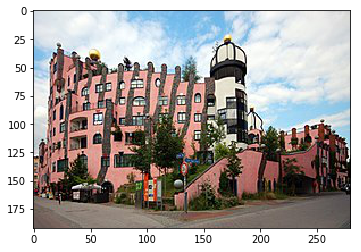

In [2]:
#Loading an image
img = Image.open('magdeburg.jpg')
plt.imshow(img) # display the image
print('Image size: '+str(img.size)) # image dimensions

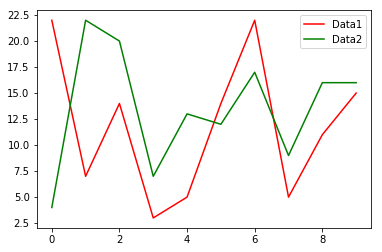

In [3]:
import numpy as np
data1 = np.random.randint(1,25,10)
data2 = np.random.randint(1,25,10)

plt.figure(1)
plt.plot(data1,'-r',label='Data1')
plt.plot(data2,'-g',label='Data2')
plt.legend()

### Tensor initialization and slicing

In [4]:
# Importing the library
import torch

In [5]:
# Defining tensors
x = torch.Tensor(2,2) # Uninitialized (garbage value present in memory)
y = torch.rand(2,2) # Random initialization
print(x)
print(y)

tensor([[9.1041e-12, 6.2609e+22],
        [4.7428e+30, 0.0000e+00]])
tensor([[0.3762, 0.4632],
        [0.8840, 0.7420]])


In [6]:
# Obtaining size of tensors
print(x.size())
print(x.shape)

torch.Size([2, 2])
torch.Size([2, 2])


In [7]:
# Arithmetic operations
z = torch.rand(2,2)
print('y = ',y)
print('z = ',z)
print('y + z = ',y+z)
print('2*z = ',2*z)

y =  tensor([[0.3762, 0.4632],
        [0.8840, 0.7420]])
z =  tensor([[0.6858, 0.6730],
        [0.1314, 0.3466]])
y + z =  tensor([[1.0620, 1.1362],
        [1.0154, 1.0886]])
2*z =  tensor([[1.3717, 1.3460],
        [0.2629, 0.6932]])


In [8]:
# Indexing is similar to numpy indexing
print(y)
print(y[1,1])
print(y[:,0])

tensor([[0.3762, 0.4632],
        [0.8840, 0.7420]])
tensor(0.7420)
tensor([0.3762, 0.8840])


In [9]:
# Converting to numpy
y_np = y.numpy()
print(y)
print(y_np)

tensor([[0.3762, 0.4632],
        [0.8840, 0.7420]])
[[0.37616163 0.46324235]
 [0.88395494 0.7420333 ]]


In [10]:
import numpy as np
# Converting from numpy to tensor
x_np = np.ones((3,3))
x_pt  = torch.from_numpy(x_np)
print('Numpy array: ',x_np)
print('Pytorch tensor: ',x_pt)

Numpy array:  [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
Pytorch tensor:  tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [11]:
# Improving computational time with GPU acceleration
import time
use_gpu = torch.cuda.is_available()
x = torch.randn(10000,10000)
if use_gpu:
    x = torch.randn(100,100)
    cpuStart = time.time()
    y = x*x
    cpuEnd = time.time()-cpuStart
    x = x.cuda()
    gpuStart = time.time()
    y = x*x
    gpuEnd = time.time()-gpuStart
    print('CPU computation completed in {:.6f}s, GPU computation completed in {:.6f}s'\
          .format(cpuEnd,gpuEnd))      

### Autograd
 This package provides automatic differentiation for all operations on Tensors

In [12]:
from torch.autograd import Variable
a = torch.ones(2,2)
a_var = Variable(a,requires_grad=True)
print(a)
print(a_var)

tensor([[1., 1.],
        [1., 1.]])
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [13]:
b = a_var+2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [14]:
print(b.grad_fn)

In [15]:
c = b*b*3
d = c.mean()
print(c)
print(d)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward1>)


In [16]:
d.backward()

In [17]:
# Gradients
print(a_var.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


### Torchvision datasets

In [18]:
%matplotlib inline
import torch
from torchvision import datasets,transforms
import matplotlib.pyplot as plt

In [19]:
apply_transform = transforms.Compose([transforms.ToTensor()])
trainDset = datasets.MNIST('./MNIST',train=True, download=True, transform= apply_transform)
testDset = datasets.MNIST('./MNIST',train=False, download=True, transform= apply_transform)

In [20]:
# Number of samples
print(len(trainDset),len(testDset))

60000 10000


Label: 5


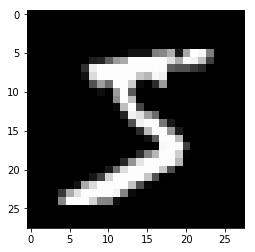

In [21]:
# Displaying sample image from the dataset
img = trainDset[0][0].numpy().transpose(1,2,0).squeeze(2)
plt.imshow(img,'gray')
print('Label: '+str(trainDset[0][1]))

In [22]:
# Creating dataloader for loading data in batches
trainLoader = torch.utils.data.DataLoader(trainDset, batch_size=10, shuffle=True, num_workers=1, pin_memory=False)
testLoader = torch.utils.data.DataLoader(testDset, batch_size=10, shuffle=True, num_workers=1, pin_memory=False)

### Defining a multi-layer perceptron

In [23]:
import torch.nn.functional as F
import torch.nn as nn
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28,100)
        self.fc2 = nn.Linear(100,10)
    def forward(self, x):
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        x = F.log_softmax(x,dim=1)
        return x

In [24]:
net = MLP()
print(net)

MLP(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


In [25]:
params = list(net.parameters())
print('No. of parameters :'+str(len(params)))
print('Dimensions of first parameter: '+str(params[0].size())) # Weights of fc1
print('Dimensions of second parameter: '+str(params[1].size())) # Biases of fc1

No. of parameters :4
Dimensions of first parameter: torch.Size([100, 784])
Dimensions of second parameter: torch.Size([100])


In [26]:
inp = trainLoader.dataset[0][0]
label = trainLoader.dataset[0][1]

In [27]:
from torch.autograd import Variable
# Feed-forward data through network
out = net(Variable(inp.view(-1,28*28)))
print(inp.size())
print(out.size())

torch.Size([1, 28, 28])
torch.Size([1, 10])


In [28]:
# Backpropagating gradients
net.zero_grad()
out.backward(torch.randn(1, 10)) # Using random gradients

In [29]:
out = net(Variable(inp.view(-1,28*28)))
# Defining loss function
criterion = nn.NLLLoss() # Negative log-likelihood loss
label = label*torch.ones(1) # Converting to tensor
loss = criterion(out,Variable(label.long())) # NLLLoss() expects the labels to be of dtype 'long'
print(loss)

tensor(2.3644, grad_fn=<NllLossBackward>)


In [30]:
# Backprogattion
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('Bias gradient of fc1 before backward')
print(net.fc1.bias.grad[:10])

loss.backward()

print('Bias gradient of fc1 after backward')
print(net.fc1.bias.grad[:10])

Bias gradient of fc1 before backward
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Bias gradient of fc1 after backward
tensor([ 0.0050, -0.0141, -0.0089,  0.0171, -0.0192,  0.0171, -0.0147, -0.0121,
         0.0194, -0.0136])


In [31]:
import copy
# Updataing weights of the network
learning_rate = 1
init_params = copy.deepcopy(net.fc2.weight.data) # Copying initial parameters

for f in net.parameters():    
    f.data.sub_(f.grad.data * learning_rate)
updated_params = net.fc2.weight.data
print(init_params[0,:5])
print(updated_params[0,:5])   

tensor([ 0.0672, -0.0530,  0.0538, -0.0393,  0.0257])
tensor([ 0.0034, -0.1212, -0.0166, -0.1084, -0.0212])
